<a href="https://colab.research.google.com/github/PrathamKumar125/Computer-Vision/blob/master/CV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **3. a) Write a program to Access the Camera.**
# **b) write a program for video writing.**


In [ ]:
import cv2
import matplotlib.pyplot as plt


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


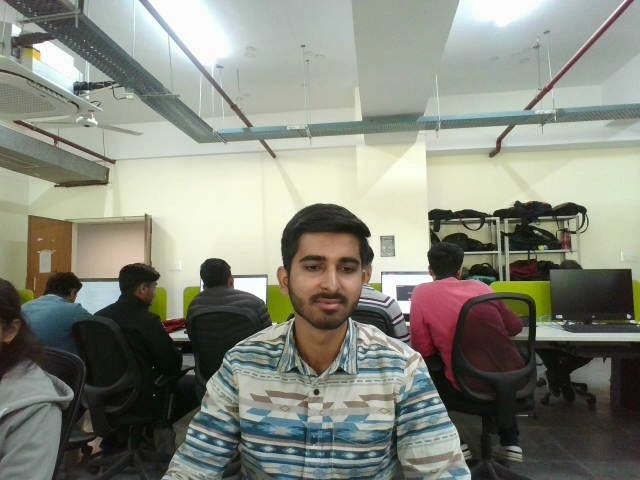

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install IPython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.3 MB/s eta 0:00:00


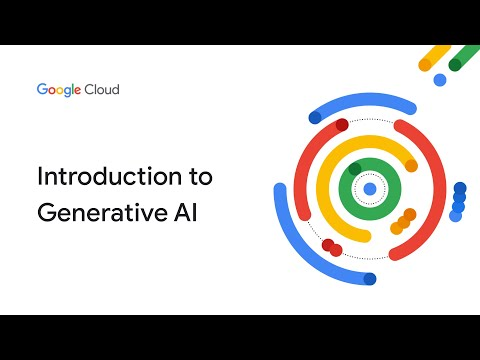

In [ ]:
from IPython.display import YouTubeVideo
video=YouTubeVideo("G2fqAlgmoPo",width=700,height= 438)
display(video)

In [ ]:
# Accessing camera through open cv
import cv2
import sys
s=0
if len(sys.argv)>1:
  s=sys.argv[1]

source=cv2.VideoCapture(s)
win_name="Camera Preview"
cv2.namedWindow(win_name,cv2.WINDOW_NORMAL)
while cv2.waitKey(1) != 27: #escape character ascii value
  has_frame,frame=source.read()
  if not has_frame:
    break
  cv2.imshow(win_name,frame)
source.release()
cv2.destroyWindow(win_name)

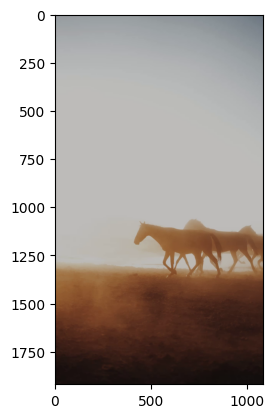

In [ ]:
########## Read a video
import cv2
source= '/content/drive/MyDrive/CV_Datasets/video.mp4'# source = 0 for webcam
cap = cv2.VideoCapture (source)
if not cap.isOpened():
  print("Error opening video stream or file")
#Read and display one frame
ret, frame = cap.read()
import matplotlib.pyplot as plt
plt.imshow(frame [...,:: -1])
plt.show()
######### Read the whole video
win_name = 'Camera Preview'
cv2.namedWindow (win_name, cv2.WINDOW_FULLSCREEN) #cv2.WINDOW_NORMAL)
while cv2.waitKey(1) != 27: # Escape
  has_frame, frame =cap.read()
  if not has_frame:
    break
  cv2.imshow(win_name, frame)
cap.release()
cv2.destroyWindow (win_name)

In [ ]:
# writing a video in opencv
import cv2
source = 0
cap = cv2.VideoCapture(source)
if not cap.isOpened():
  print("Error opening video stream or file")
win_name = 'Cam preview'
cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps=10
out_mp4 = cv2.VideoWriter("output.mp4", cv2.VideoWriter_fourcc(*"XVID"), fps, (frame_width, frame_height))
while cv2.waitKey(1) != 27:
  ret, frame = cap.read()
  if ret:
    out_mp4.write(frame)
    cv2.imshow(win_name, frame)
  else:
    break
cap.release()
out_mp4.release()
cv2.destroyWindow(win_name)

In [ ]:
import cv2

import sys

import numpy

PREVIEW = 0# Preview Mode
BLUR = 1# Blurring Filter
FEATURES = 2# Corner Feature Detector
CANNY= 3#Canny Edge Detector
s=0
if len(sys.argv) > 1 :
  s = sys.argv[1]

image_filter = PREVIEW
alive =True

win_name="Camera Filters"
cv2.namedWindow(win_name,cv2.WINDOW_NORMAL)
rsult=None

source=cv2.VideoCapture(s)

while alive:
  has_frame,frame=source.read()
  if not has_frame:
    break
  # frame cv2.flip(frame, 1)

  if image_filter == PREVIEW: result = frame
  elif image_filter == CANNY:result = cv2.Canny (frame, 80, 150)
  elif image_filter == BLUR:result = cv2.blur(frame, (13, 13))
  elif image_filter ==FEATURES:
    result = frame
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    corners= cv2.goodFeaturesToTrack(frame_gray, 250,0.01,10)
    corners=numpy.int32 (corners)

    for i in corners:
      x,y=i.ravel ()
      cv2.circle(result, (x,y), 5, (0,0,155), 2)

  cv2.imshow(win_name, result)

  key = cv2.waitKey (1)
  if key == ord ("Q") or key == ord("q") or key == 27: alive = False
  elif key==ord ("C") or key == ord("c"):image_filter = CANNY
  elif key==ord ("B") or key == ord("b"): image_filter = BLUR
  elif key==ord("F") or key == ord("f"):image_filter = FEATURES
  elif key== ord ("P") or key == ord("p"):image_filter= PREVIEW

source.release()
cv2.destroyWindow(win_name)
